# A quick start guide to graphs 

In this example, we show how to create graphs. We show how to create and configure its axes and its colors. We show how to create a plot based on the combination of several plots.

## The `draw` method the `Graph` class

The simplest way to create a graphics is to use the `draw` method. The `Normal` distribution for example provides a method to draw the density function of the gaussian distribution. 

In [1]:
import openturns as ot

In [2]:
n = ot.Normal()
n

class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1]

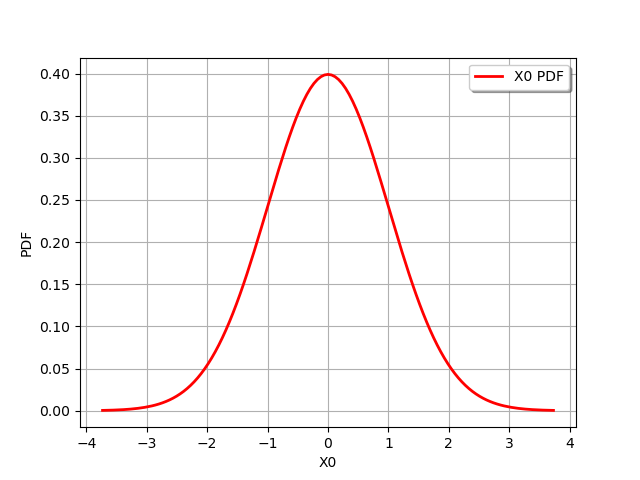

In [3]:
n.drawPDF()

To configure the look of the plot, we can first observe the type of graphics returned by the `drawPDF` method returns: it is a `Graph`.

In [4]:
graph = n.drawPDF()
type(graph)

openturns.graph.Graph

The `Graph` class provides several methods to configure the legends, the title and the colors. Since a graphics  can contain several sub-graphics, the `setColors` takes a list of colors as inputs argument: each item of the list corresponds to the sub-graphics.

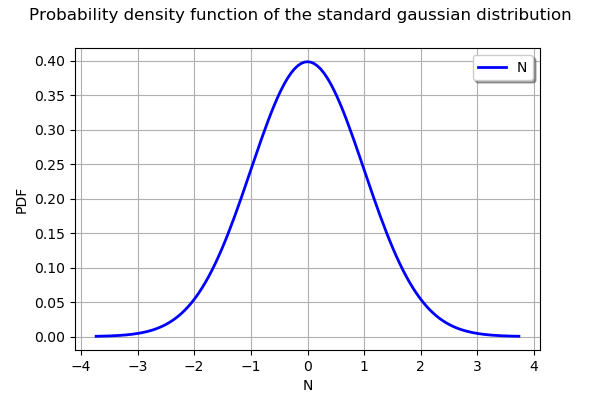

In [5]:
graph.setXTitle("N")
graph.setYTitle("PDF")
graph.setTitle("Probability density function of the standard gaussian distribution")
graph.setLegends(["N"])
graph.setColors(["blue"])
graph

## Combine several graphics

In order to combine several graphics, we can use the `add` method.

Let us create an empirical histogram from a sample.

In [6]:
sample = n.getSample(100)

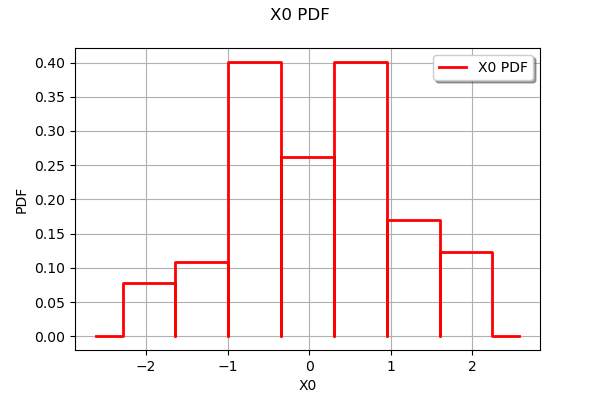

In [7]:
histo = ot.HistogramFactory().build(sample).drawPDF()
histo

Then we add the histogram to the `graph` with the `add` method. The `graph` then contains two plots.

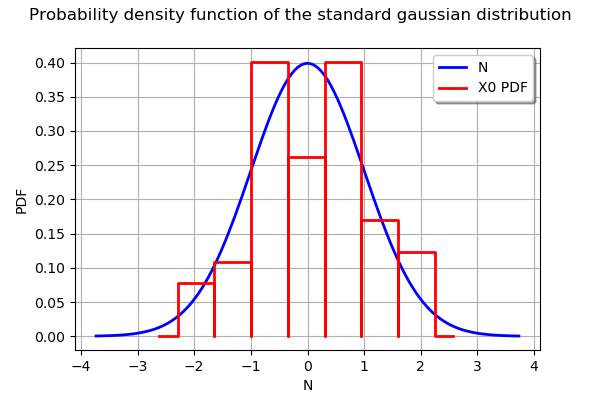

In [8]:
graph.add(histo)
graph

## Draw a cloud

The `Cloud` class creates clouds of bidimensional points. To demonstrate it, let us create two gaussian distributions in two dimensions.

In [9]:
# Create a Funky distribution
corr = ot.CorrelationMatrix(2)
corr[0, 1] = 0.2
copula = ot.NormalCopula(corr)
x1 = ot.Normal(-1., 1)
x2 = ot.Normal(2, 1)
x_funk = ot.ComposedDistribution([x1, x2], copula)

In [10]:
# Create a Punk distribution
x1 = ot.Normal(1.,1)
x2 = ot.Normal(-2,1)
x_punk = ot.ComposedDistribution([x1, x2], copula)

Let us mix these two distributions.

In [11]:
mixture = ot.Mixture([x_funk, x_punk], [0.5,1.])

In [12]:
n=500
sample = mixture.getSample(n)

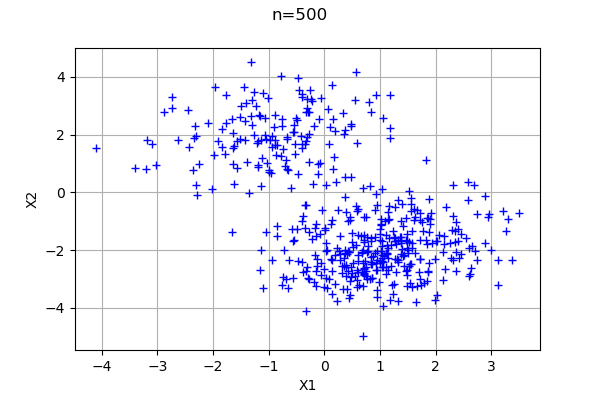

In [13]:
graph = ot.Graph("n=%d" % (n), "X1", "X2", True, '')
cloud = ot.Cloud(sample)
graph.add(cloud)
graph

We sometimes want to customize the graphics by choosing the type of point (square, triangle, circle, etc...), of line (continuous, dashed, etc...) or another parameter. We can know the list of possible values with the corresponding `getValid` method. 

For example, the following function returns the possible values of the `PointStyle` parameter.

In [14]:
ot.Drawable.GetValidPointStyles()

[bullet,circle,diamond,dot,fcircle,fdiamond,fsquare,ftriangleup,none,plus,square,star,times,triangledown,triangleup]

The following method returns the list of colors.

In [15]:
ot.Drawable.GetValidColors()

[aliceblue,antiquewhite,antiquewhite1,antiquewhite2,antiquewhite3,antiquewhite4,aquamarine,aquamarine1,aquamarine2,aquamarine3,aquamarine4,azure,azure1,azure2,azure3,azure4,beige,bisque,bisque1,bisque2,bisque3,bisque4,black,blanchedalmond,blue,blue1,blue2,blue3,blue4,blueviolet,brown,brown1,brown2,brown3,brown4,burlywood,burlywood1,burlywood2,burlywood3,burlywood4,cadetblue,cadetblue1,cadetblue2,cadetblue3,cadetblue4,chartreuse,chartreuse1,chartreuse2,chartreuse3,chartreuse4,chocolate,chocolate1,chocolate2,chocolate3,chocolate4,coral,coral1,coral2,coral3,coral4,cornflowerblue,cornsilk,cornsilk1,cornsilk2,cornsilk3,cornsilk4,cyan,cyan1,cyan2,cyan3,cyan4,darkblue,darkcyan,darkgoldenrod,darkgoldenrod1,darkgoldenrod2,darkgoldenrod3,darkgoldenrod4,darkgray,darkgreen,darkgrey,darkkhaki,darkmagenta,darkolivegreen,darkolivegreen1,darkolivegreen2,darkolivegreen3,darkolivegreen4,darkorange,darkorange1,darkorange2,darkorange3,darkorange4,darkorchid,darkorchid1,darkorchid2,darkorchid3,darkorchid4,darkred,darksalmon,darkseagreen,darkseagreen1,darkseagreen2,darkseagreen3,darkseagreen4,darkslateblue,darkslategray,darkslategray1,darkslategray2,darkslategray3,darkslategray4,darkslategrey,darkturquoise,darkviolet,deeppink,deeppink1,deeppink2,deeppink3,deeppink4,deepskyblue,deepskyblue1,deepskyblue2,deepskyblue3,deepskyblue4,dimgray,dimgrey,dodgerblue,dodgerblue1,dodgerblue2,dodgerblue3,dodgerblue4,firebrick,firebrick1,firebrick2,firebrick3,firebrick4,floralwhite,forestgreen,gainsboro,ghostwhite,gold,gold1,gold2,gold3,gold4,goldenrod,goldenrod1,goldenrod2,goldenrod3,goldenrod4,gray,gray0,gray1,gray10,gray100,gray11,gray12,gray13,gray14,gray15,gray16,gray17,gray18,gray19,gray2,gray20,gray21,gray22,gray23,gray24,gray25,gray26,gray27,gray28,gray29,gray3,gray30,gray31,gray32,gray33,gray34,gray35,gray36,gray37,gray38,gray39,gray4,gray40,gray41,gray42,gray43,gray44,gray45,gray46,gray47,gray48,gray49,gray5,gray50,gray51,gray52,gray53,gray54,gray55,gray56,gray57,gray58,gray59,gray6,gray60,gray61,gray62,gray63,gray64,gray65,gray66,gray67,gray68,gray69,gray7,gray70,gray71,gray72,gray73,gray74,gray75,gray76,gray77,gray78,gray79,gray8,gray80,gray81,gray82,gray83,gray84,gray85,gray86,gray87,gray88,gray89,gray9,gray90,gray91,gray92,gray93,gray94,gray95,gray96,gray97,gray98,gray99,green,green1,green2,green3,green4,greenyellow,grey,grey0,grey1,grey10,grey100,grey11,grey12,grey13,grey14,grey15,grey16,grey17,grey18,grey19,grey2,grey20,grey21,grey22,grey23,grey24,grey25,grey26,grey27,grey28,grey29,grey3,grey30,grey31,grey32,grey33,grey34,grey35,grey36,grey37,grey38,grey39,grey4,grey40,grey41,grey42,grey43,grey44,grey45,grey46,grey47,grey48,grey49,grey5,grey50,grey51,grey52,grey53,grey54,grey55,grey56,grey57,grey58,grey59,grey6,grey60,grey61,grey62,grey63,grey64,grey65,grey66,grey67,grey68,grey69,grey7,grey70,grey71,grey72,grey73,grey74,grey75,grey76,grey77,grey78,grey79,grey8,grey80,grey81,grey82,grey83,grey84,grey85,grey86,grey87,grey88,grey89,grey9,grey90,grey91,grey92,grey93,grey94,grey95,grey96,grey97,grey98,grey99,honeydew,honeydew1,honeydew2,honeydew3,honeydew4,hotpink,hotpink1,hotpink2,hotpink3,hotpink4,indianred,indianred1,indianred2,indianred3,indianred4,ivory,ivory1,ivory2,ivory3,ivory4,khaki,khaki1,khaki2,khaki3,khaki4,lavender,lavenderblush,lavenderblush1,lavenderblush2,lavenderblush3,lavenderblush4,lawngreen,lemonchiffon,lemonchiffon1,lemonchiffon2,lemonchiffon3,lemonchiffon4,lightblue,lightblue1,lightblue2,lightblue3,lightblue4,lightcoral,lightcyan,lightcyan1,lightcyan2,lightcyan3,lightcyan4,lightgoldenrod,lightgoldenrod1,lightgoldenrod2,lightgoldenrod3,lightgoldenrod4,lightgoldenrodyellow,lightgray,lightgreen,lightgrey,lightpink,lightpink1,lightpink2,lightpink3,lightpink4,lightsalmon,lightsalmon1,lightsalmon2,lightsalmon3,lightsalmon4,lightseagreen,lightskyblue,lightskyblue1,lightskyblue2,lightskyblue3,lightskyblue4,lightslateblue,lightslategray,lightslategrey,lightsteelblue,lightsteelblue1,lightsteelblue2,lightsteelblue3,lightsteelblue4,lightyellow

In the following graphics, we use the "aquamarine1" color with "fcircle" circles.

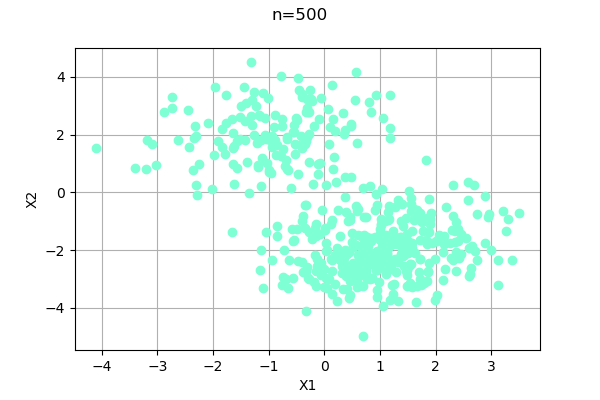

In [16]:
graph = ot.Graph("n=%d" % (n), "X1", "X2", True, '')
cloud = ot.Cloud(sample)
cloud.setColor("aquamarine1")
cloud.setPointStyle("fcircle")
graph.add(cloud)
graph

## Configure the style of points and the thickness of a curve

Assume that we want to plot the sine curve from -2 to 2. The simplest way is to use the `draw` method of the function.

In [17]:
g = ot.SymbolicFunction("x","sin(x)")

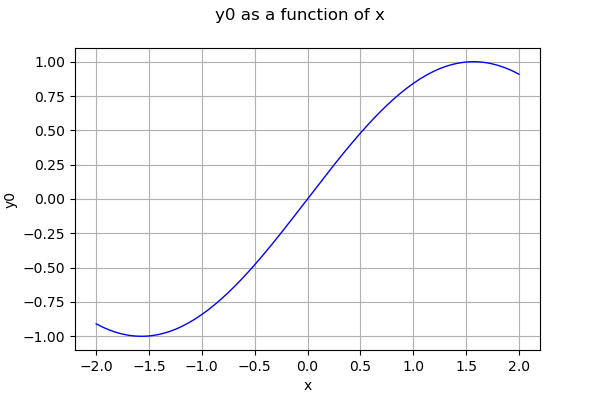

In [18]:
g.draw(-2,2)

I would rather get a dashed curve: let us search for the available line styles. 

In [19]:
ot.Drawable.GetValidLineStyles()

[blank,solid,dashed,dotted,dotdash,longdash,twodash]

In order to use the `Curve` class, it will be easier if we have a method to generate a `Sample` containing points regularly spaced in an interval.

In [20]:
def linearSample(xmin,xmax,npoints):
    '''Returns a sample created from a regular grid 
    from xmin to xmax with npoints points.'''
    step = (xmax-xmin)/(npoints-1)
    rg = ot.RegularGrid(xmin, step, npoints)
    vertices = rg.getVertices()
    return vertices

In [21]:
x = linearSample(-2,2,50)
y = g(x)

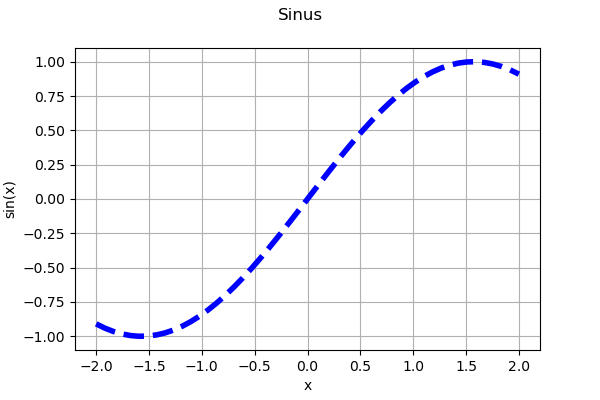

In [22]:
graph = ot.Graph("Sinus","x","sin(x)",True)
curve = ot.Curve(x,y)
curve.setLineStyle("dashed")
curve.setLineWidth(4)
graph.add(curve)
graph

## Create colored curves

In some situations, we want to create curves with different colors. In this case, the following function generates a color corresponding to the `indexCurve` integer in a ensemble of `maximumNumberOfCurves` curves.

In [23]:
def createHSVColor(indexCurve,maximumNumberOfCurves):
    '''Create a HSV color for the indexCurve-th curve 
    from a sample with maximum size equal to maximumNumberOfCurves'''
    color = ot.Drawable.ConvertFromHSV(indexCurve * 360.0/maximumNumberOfCurves, 1.0, 1.0)
    return color

In [24]:
pofa = ot.HermiteFactory()

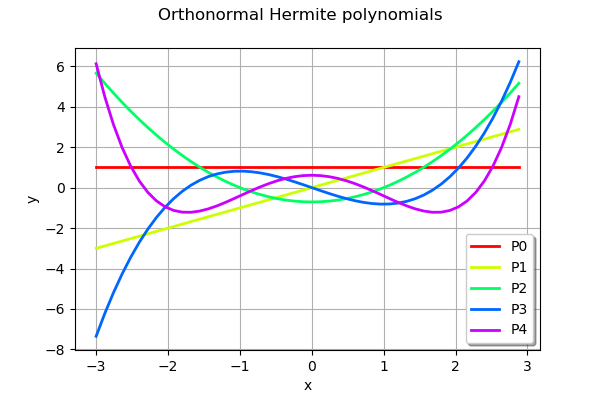

In [25]:
graph = ot.Graph("Orthonormal Hermite polynomials","x","y",True,"bottomright")
degreemax = 5
for k in range(degreemax):
    pk = pofa.build(k)
    curve = pk.draw(-3.,3.,50)
    curve.setLegends(["P%d" % (k)])
    curve.setColors([createHSVColor(k,degreemax)])
    graph.add(curve)
graph

## Create matrices of graphics

The library does *not* has objects to create a grid of graphics. However, we can use the `add_subplot` function from Matplotlib.

Let us create two graphics of the PDF and CDF of the following gaussian distribution..

In [26]:
n = ot.Normal()
myPDF = n.drawPDF()
myCDF = n.drawCDF()

In [27]:
import pylab as pl
import openturns.viewer as otv

We create a figure with the `figure` function from Matplotlib, then we add two graphics with the `add_subplot` function. We use the `viewer.View` function to create the required Matplotlib object. Since we are not interested by the output of the `View` function, we use the dummy variable `_` as output. The title is finally configured with `suptitle`.

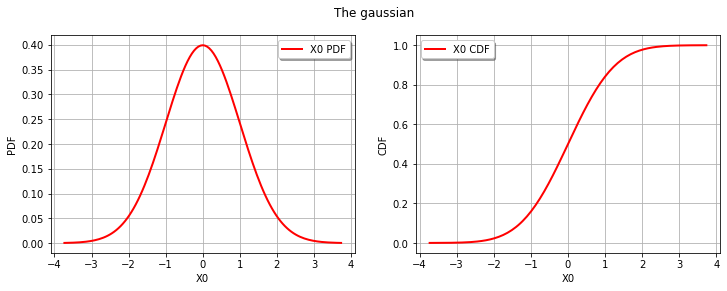

In [28]:
fig = pl.figure(figsize=(12, 4))
ax_pdf = fig.add_subplot(1, 2, 1)
_ = otv.View(myPDF, figure=fig, axes=[ax_pdf])
ax_cdf = fig.add_subplot(1, 2, 2)
_ = otv.View(myCDF, figure=fig, axes=[ax_cdf])
_ = fig.suptitle("The gaussian")

## Save a plot into a file

The `View` class has a `save` method which saves the graph into an image.

In [29]:
import openturns.viewer as otv

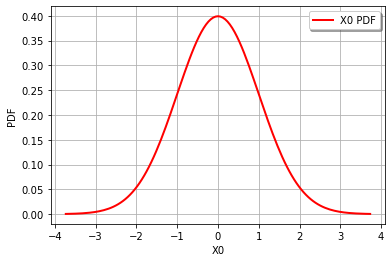

In [30]:
n = ot.Normal()
graph = n.drawPDF()
view = otv.View(graph)
view.save("normal.png")

We can use the `dpi` option to configure the resolution in dots per inch.

In [31]:
view.save("normal-100dpi.png", dpi=100)

## Configure the size of a graph with matplotlib

In [32]:
import openturns.viewer as otv

We first create a graph containing the PDF of a gaussian distribution

In [33]:
n = ot.Normal()
graph = n.drawPDF()

The `figure_kw` keyword argument sets the optional arguments of the figure. In the following statement, we set the figure size in inches

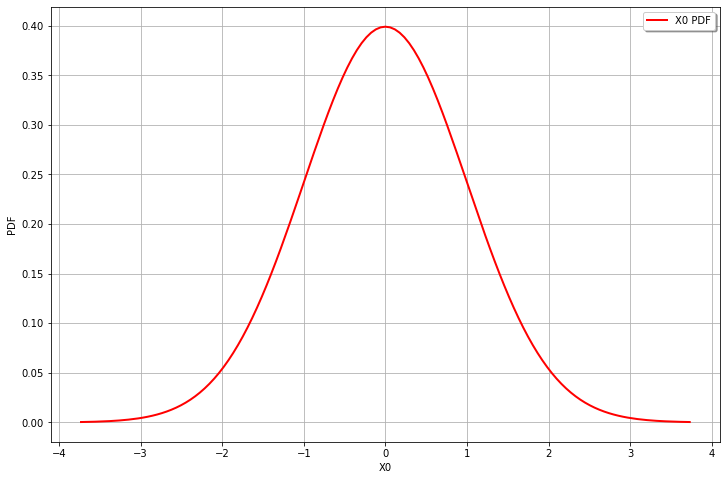

In [34]:
view = otv.View(graph, figure_kw = {"figsize": (12, 8)})

The `getFigure` method returns the current figure. This allows to configure it as any other Matplotlib figure. In the following example, we configure the `suptitle`.

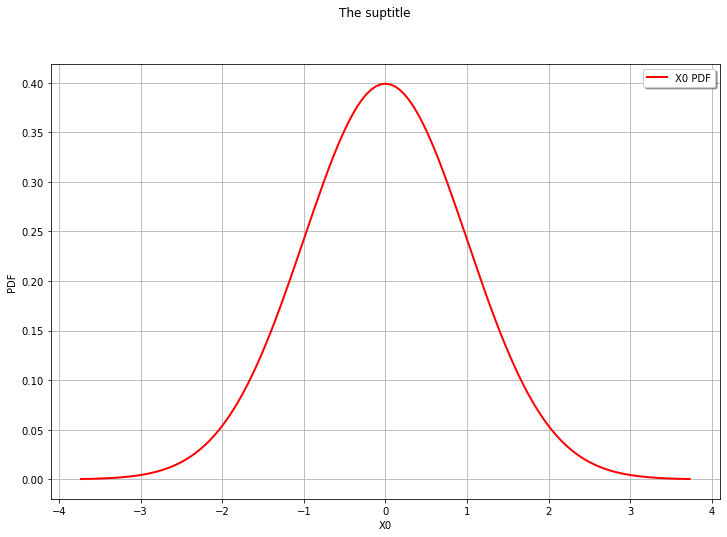

In [35]:
fig = view.getFigure()
fig.suptitle("The suptitle")
fig

The `plot_kw` optional argument sets the arguments of the plot. In the following example, we set the color of the plot in blue. 

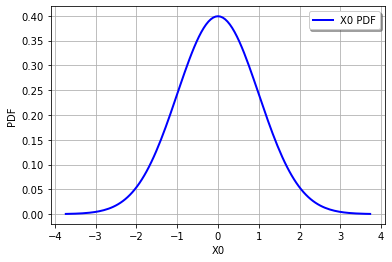

In [36]:
view = otv.View(graph, plot_kw={'color':'blue'})